# GRIP: The Sparks Foundation Internship

# Author: Akash Kokne

# Data Science & Business Analytics Intern

# Task 2: Prediction using Unsupervised Machine Learning

I explore the Iris dataset contains with 50 samples for each class, and 150 samples in total, where each class refers to a type of iris plant.
The format for the data: Sepal & petal measurement and Class (Species of flower): Iris Setosa, Iris Versicolour, Iris Virginica

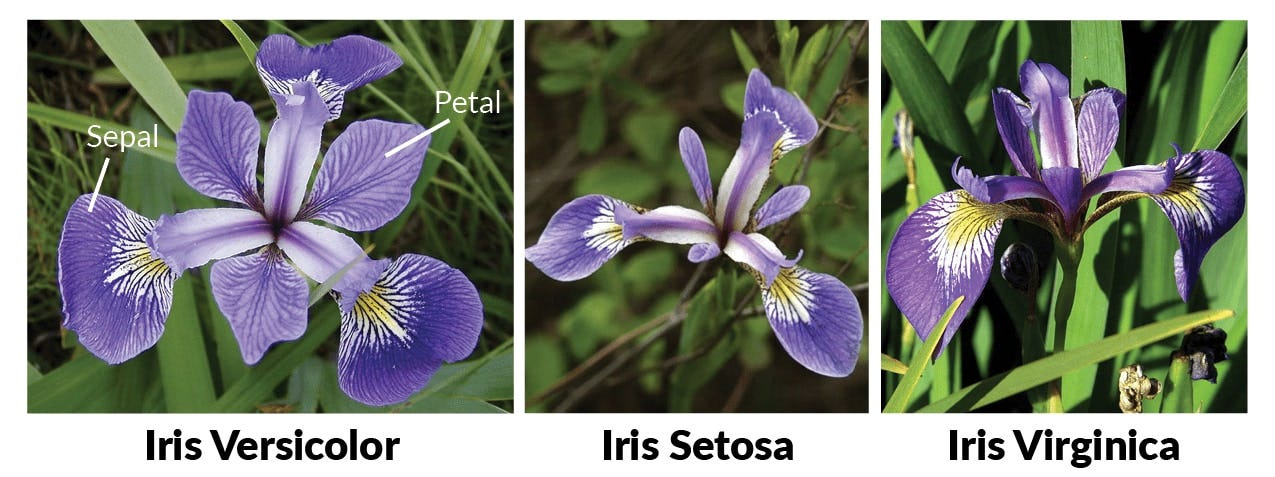

In [1]:
from IPython import display
display.Image("Iris flower.jpg")

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Load the Iris Dataset

In [3]:
data=pd.read_csv("iris.csv")

In [4]:
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
df=data.drop(["Id"],axis=1)
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

# Exploratory Data Analysis

In [6]:
df.shape

(150, 5)

In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [10]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [11]:
# Checking Missing Values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing values.

# Data Visualization

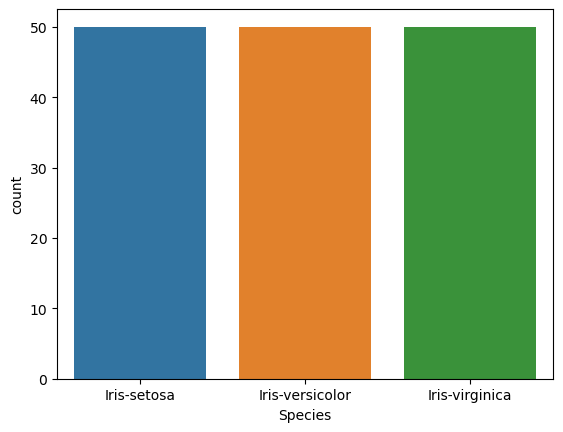

In [12]:
sns.countplot(x='Species', data=df)
plt.show()

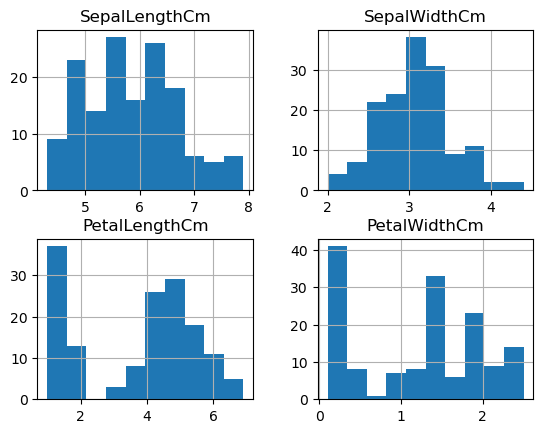

In [13]:
# Univariate Plots
df.hist()
plt.show()

from above plot, we can see that -

Highest frequency of sepal length is between 30-35 which is between 5.5 & 6

Highest frequency of sepal width is between 40 which is between 3.0 & 3.5

Highest frequency of petal length is between 30-40 which is between 1 & 2

Highest frequency of petal width is between 40-50 which is between 0.0 & 0.5

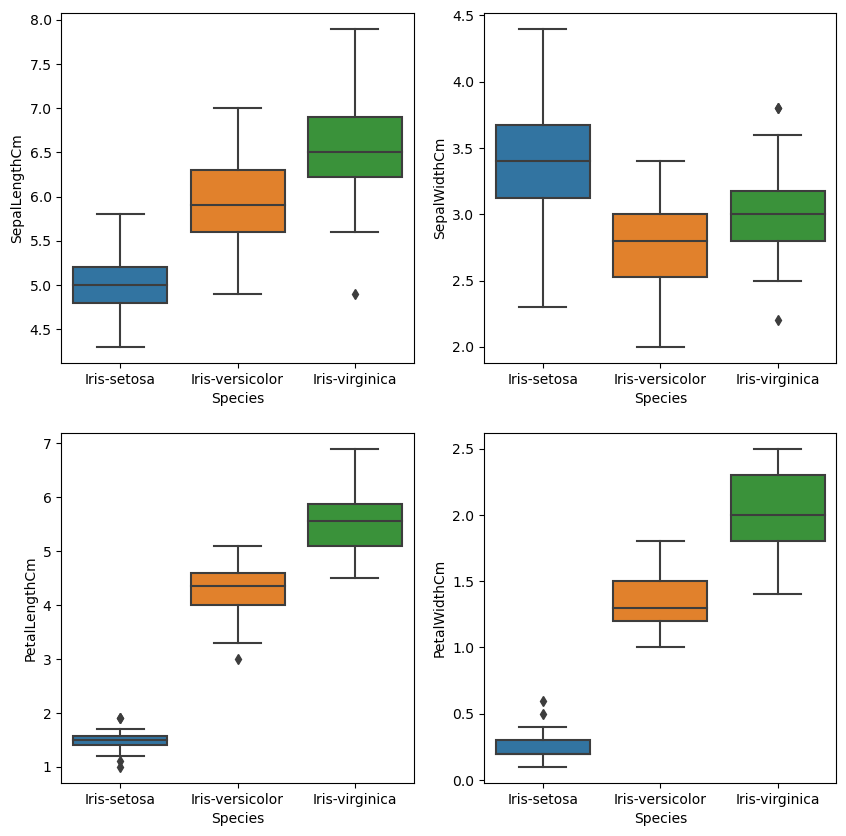

In [14]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
plt.figure(figsize=(10,10)) 
plt.subplot(221)
graph('SepalLengthCm')
plt.subplot(222)
graph('SepalWidthCm')
plt.subplot(223)
graph('PetalLengthCm')
plt.subplot(224)
graph('PetalWidthCm')
plt.show()

From the above plot we can infer that -

species setosa has smallest features & less distributed with some outliers.

species Versicolor has the average features.

species Virginica has hightest features.

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

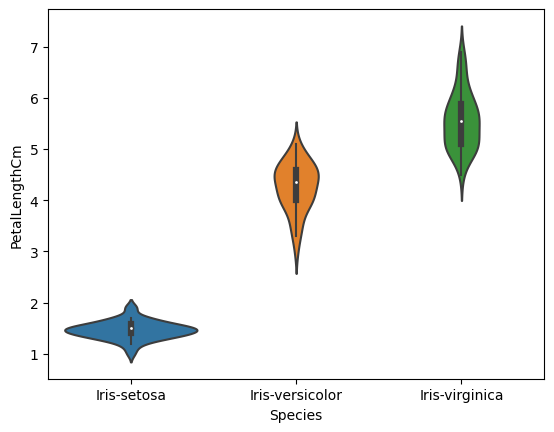

In [15]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=5)

Violin plot combines the benefits of the histogram & boxplot and simplifies them denser regions of the data are fatter, and sparser thiner in a violin plot.

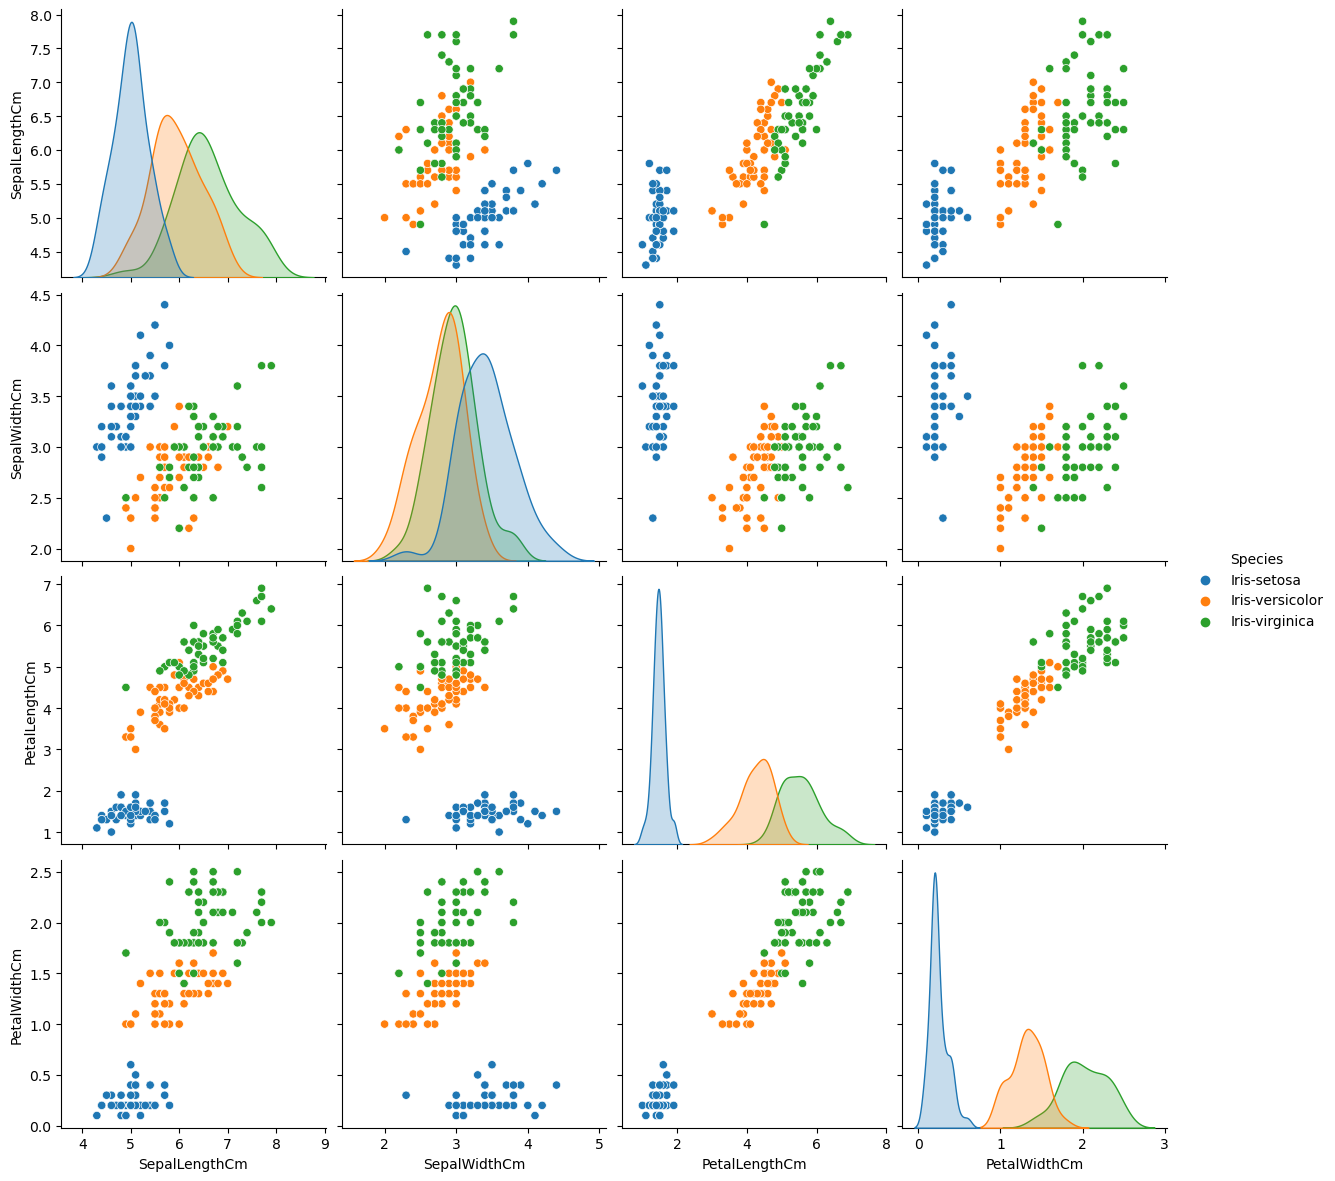

In [16]:
sns.pairplot(df, hue="Species", size=3)

We can see many types of relationships from this pairplot such as species Setosa has smallest of petal measurement. It also has smallest sepal length but larger sepal width and see that species setosa is seperated from the other two across all feature combinations.

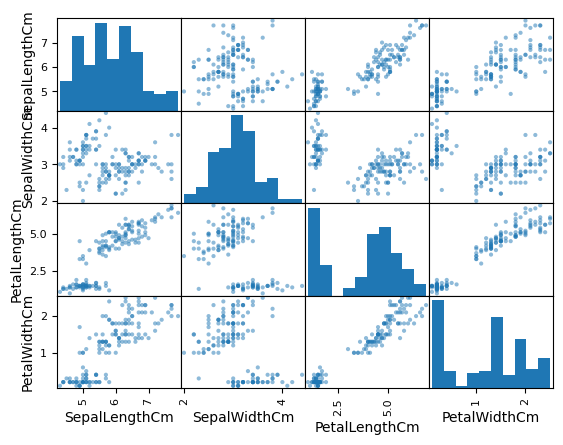

In [17]:
# Multivariate Plots
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

Note that the diagonal grouping of some pairs attributes. This suggests a high correlation and a predictable relationship.

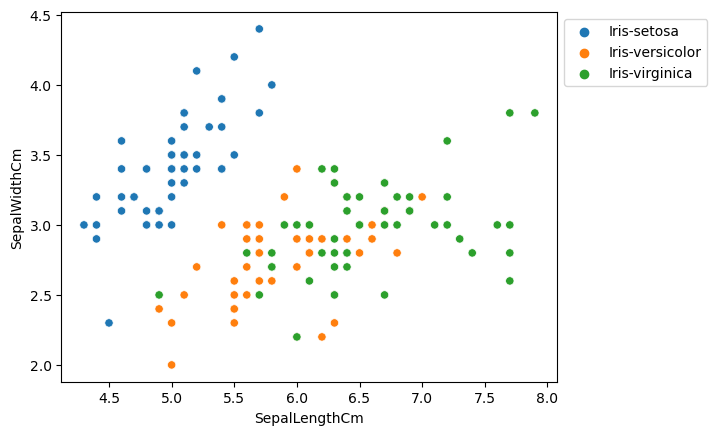

In [18]:
#comparing sepal length and sepal width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

From the above plot we can infer that -

species setosa has smaller sepal length but larger sepal widths.

species Versicolor lies in the middle of the other two species in terms of sepal length and width.

species Virginica has larger sepal lengths but smaller sepal widths.

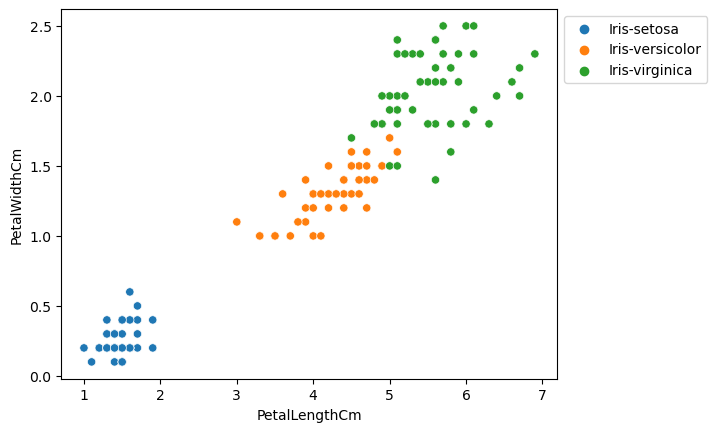

In [19]:
#comparing petal length and petal width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

From the above plot we can infer that -

species setosa has smaller petal length and widths.

species Versicolor lies in the middle of the other two species in terms of petal length and width.

species Virginica has largest of petal lengths and widths.

In [20]:
corrmat=df.corr(method='pearson')
corrmat

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

<AxesSubplot:>

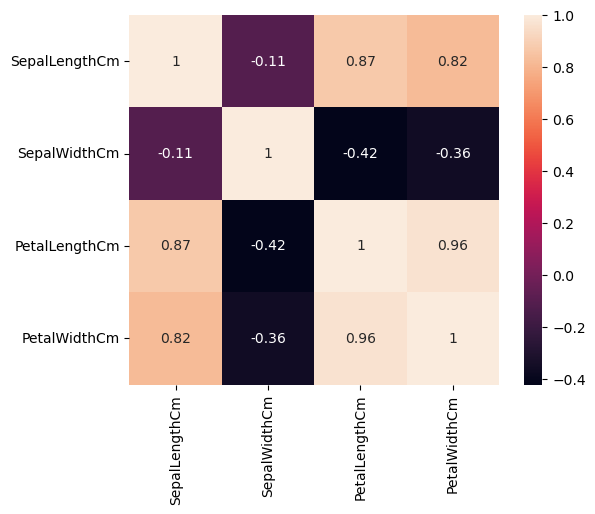

In [21]:
sns.heatmap(corrmat, annot=True, square=True)

From above plot, we can see that-

Petal width & sepal length have high correlations.

Petal length & petal width have good correlations.

From EDA, It conclude that feature "Petal length" properly differentiates classes, Hence feature importance of petal length should be more.

# Extracting important features for K-mean clustering algorithm

In [22]:
x = df.iloc[:,:-1].values

# Find No. of clusters for K-means classification

In [23]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

WCSS (Within Cluster Sum of Squares) is sum of squared distance between each point & centroid.


# Elbow Plot

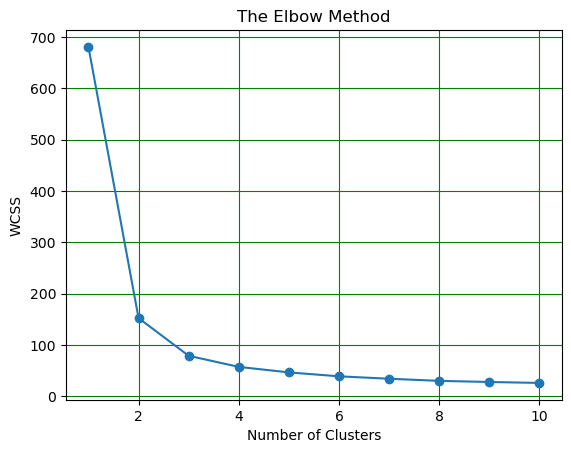

In [24]:
#The Elbow Method
plt.plot(range(1, 11), wcss, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(color = 'green')
plt.show()

The point at which the elbow shape is created is '3'; that is, our k value or an optimal number of clusters is 3.

# KMeans Clustering Model

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [26]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

y_kmeans gives us different clusters corresponding to x, Now Let's plot all the clustering using matplotlib

# Plot Clusters in Graph

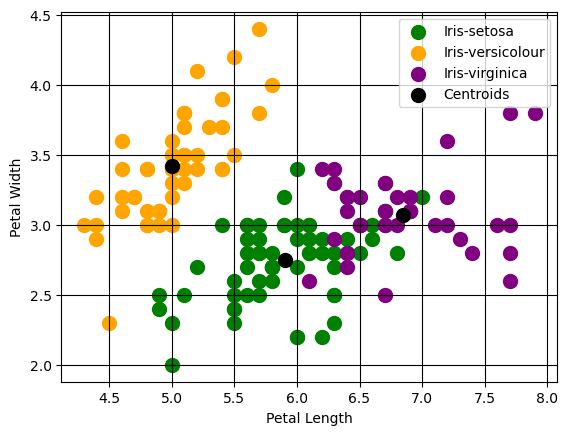

In [27]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'purple', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.grid(color = 'black')
plt.legend()

Now you can see the clusters using scatter plot. As you can see, there are 3 clusters in total that are visualised in different colors and centroid of each cluster is visualized in block color.

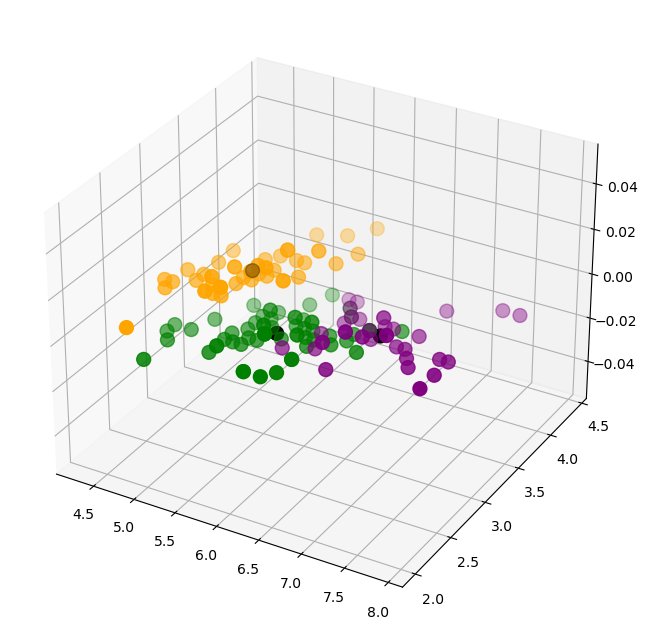

In [28]:
# 3d scatterplot using matplotlib 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'purple', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()